In [20]:
import os
import wget
import zipfile
import tarfile

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Download data

In [15]:
DATA_PATH = 'data/'

def download_figshare(file_name, file_ext, dir_path='./', change_name=None):
    url = 'https://ndownloader.figshare.com/files/' + file_name
    wget.download(url, out=dir_path)
    file_path = os.path.join(dir_path, file_name)

    if file_ext == '.zip':
        zip_ref = zipfile.ZipFile(file_path,'r')
        if change_name is not None:
            dir_path = os.path.join(dir_path, change_name)
        zip_ref.extractall(dir_path)
        zip_ref.close()
        os.remove(file_path)
    elif file_ext == '.tar.bz2':
        tar_ref = tarfile.open(file_path,'r:bz2')
        if change_name is not None:
            dir_path = os.path.join(dir_path, change_name)
        tar_ref.extractall(dir_path)
        tar_ref.close()
        os.remove(file_path)
    elif change_name is not None:
        os.rename(file_path, os.path.join(dir_path, change_name))

def maybe_download_qm9(path):
    full_path = os.path.join(DATA_PATH, 'QM9')
    if not os.path.exists(full_path):
        print('downloading...')
        if not os.path.exists(full_path):
            os.mkdir(full_path)
        
        download_figshare('3195392', '.txt', full_path, 'readme.txt')
        download_figshare('3195395', '.txt', full_path, 'atomref.txt')
        download_figshare('3195401', '.txt', full_path, 'validation.txt')
        download_figshare('3195404', '.txt', full_path, 'uncharacterized.txt')
        download_figshare('3195389', '.tar.bz2', full_path, 'dsgdb9nsd')
        download_figshare('3195398', '.tar.bz2', full_path, 'dsC702H10nsd')
        print('done')
        
maybe_download_qm9(DATA_PATH)

In [19]:
df = pd.read_csv('data/periodic_table.csv')
df.head()

,AtomicNumber,Element,Symbol,AtomicMass,NumberofNeutrons,NumberofProtons,NumberofElectrons,Period,Group,Phase,...,FirstIonization,Density,MeltingPoint,BoilingPoint,NumberOfIsotopes,Discoverer,Year,SpecificHeat,NumberofShells,NumberofValence
0,1,Hydrogen,H,1.007,0,1,1,1,1.0,gas,...,13.5984,0.000090,14.175,20.28,3.0,Cavendish,1766.0,14.304,1,1.0
1,2,Helium,He,4.002,2,2,2,1,18.0,gas,...,24.5874,0.000179,NaN,4.22,5.0,Janssen,1868.0,5.193,1,NaN
2,3,Lithium,Li,6.941,4,3,3,2,1.0,solid,...,5.3917,0.534000,453.850,1615.00,5.0,Arfvedson,1817.0,3.582,2,1.0
3,4,Beryllium,Be,9.012,5,4,4,2,2.0,solid,...,9.3227,1.850000,1560.150,2742.00,6.0,Vaulquelin,1798.0,1.825,2,2.0
4,5,Boron,B,10.811,6,5,5,2,13.0,solid,...,8.2980,2.340000,2573.150,4200.00,6.0,Gay-Lussac,1808.0,1.026,2,3.0


In [27]:
print(df.columns)

Index(['AtomicNumber', 'Element', 'Symbol', 'AtomicMass', 'NumberofNeutrons',
       'NumberofProtons', 'NumberofElectrons', 'Period', 'Group', 'Phase',
       'Radioactive', 'Natural', 'Metal', 'Nonmetal', 'Metalloid', 'Type',
       'AtomicRadius', 'Electronegativity', 'FirstIonization', 'Density',
       'MeltingPoint', 'BoilingPoint', 'NumberOfIsotopes', 'Discoverer',
       'Year', 'SpecificHeat', 'NumberofShells', 'NumberofValence'],
      dtype='object')


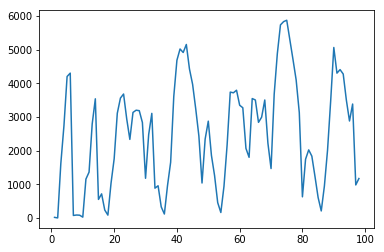

In [41]:
plt.plot(df.AtomicNumber, df.BoilingPoint)
# plt.plot(df.AtomicNumber, df.NumberofValence)